In [1]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# Ler dados do yahoo
!pip install yfinance
!pip install pandas_datareader
from pandas_datareader.data import DataReader
import yfinance as yf

# Importando datetime
from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# ações a serem utilizadas
lista_acoes = ["TSLA", "AAPL", "GOOG", "AMZN"]

# Configurando tempo inicial e final 
final = datetime.now()
inicial = datetime(final.year - 1, final.month, final.day)

for estoque in lista_acoes:
    globals()[estoque] = yf.download(estoque, inicial, final)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
lista_empresas = [TSLA, AAPL, GOOG, AMZN]
nome_empresas = ["TESLA","APPLE", "GOOGLE",  "AMAZON"]

for empresa, nome in zip(lista_empresas, nome_empresas):
    empresa["company_name"] = nome
    
arquivo = pd.concat(lista_empresas, axis=0)
arquivo

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-10-04 00:00:00-04:00,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TESLA
2021-10-05 00:00:00-04:00,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TESLA
2021-10-06 00:00:00-04:00,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TESLA
2021-10-07 00:00:00-04:00,261.820007,268.333344,261.126678,264.536682,264.536682,57587400,TESLA
2021-10-08 00:00:00-04:00,265.403320,265.459991,260.303345,261.829987,261.829987,50215800,TESLA
...,...,...,...,...,...,...,...
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002,118.010002,55763800,AMAZON
2022-09-29 00:00:00-04:00,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMAZON
2022-09-30 00:00:00-04:00,114.080002,116.919998,112.839996,113.000000,113.000000,59409800,AMAZON


In [4]:
# Dados estatísticos para ações da Tesla

TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.102160,307.485731,292.018142,299.624453,299.624453,8.090248e+07
std,46.175580,46.800591,44.783099,45.882174,45.882174,2.538674e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.513336,273.266663,260.799988,266.923340,266.923340,6.361540e+07
50%,298.500000,303.709991,289.130005,296.666656,296.666656,7.762060e+07
75%,335.600006,344.950012,327.510010,336.336670,336.336670,9.433620e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


In [5]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-10-04 00:00:00-04:00 to 2022-10-04 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


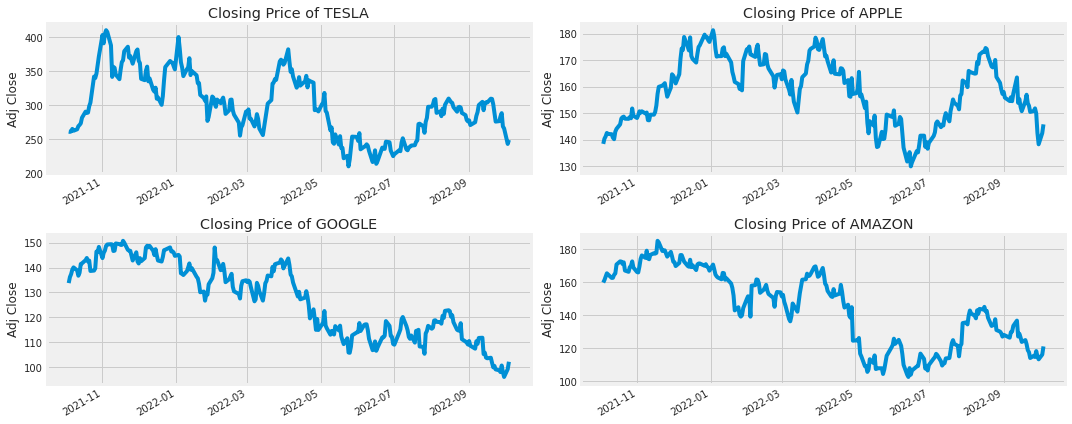

In [6]:
# Verificando o histórico de fechado das ações

plt.figure(figsize = (15, 6))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(lista_empresas, 1):
    plt.subplot(2, 2, i)
    company["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title("Closing Price of {}" .format(nome_empresas[i - 1]))
    
plt.tight_layout()

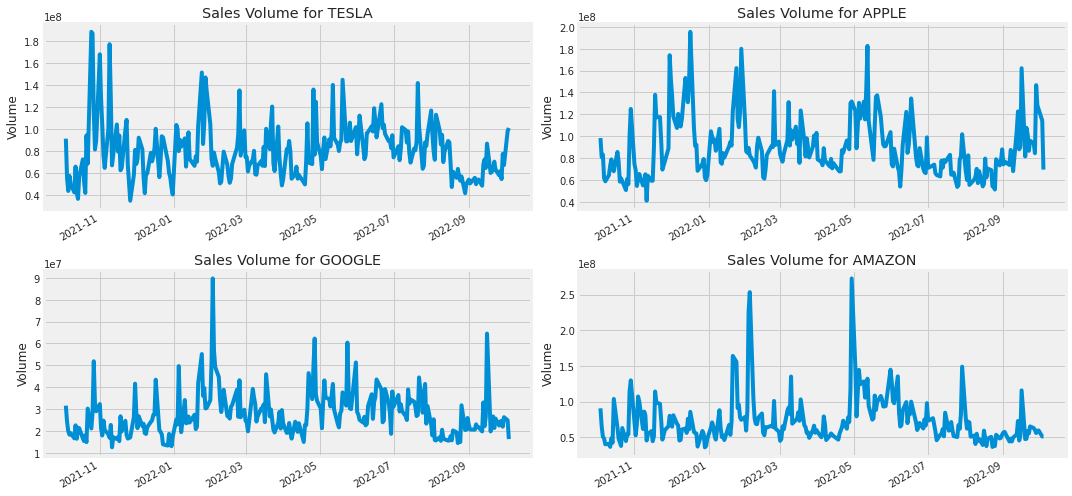

In [7]:
# Platar gráfico do volume de ações negociadas

plt.figure(figsize = (15, 7))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(lista_empresas, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title("Sales Volume for {}" .format(nome_empresas[i - 1]))
    
plt.tight_layout()

In [8]:
!pip install fix_yahoo_finance

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:>

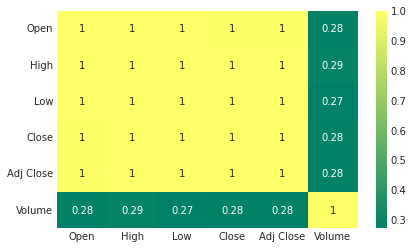

In [9]:
sns.heatmap(arquivo.corr(), annot=True, cmap='summer')

In [10]:
arquivo_df = DataReader("TSLA", data_source = "yahoo", start = '2012-01-01', end = datetime.now())

#Verificando
arquivo_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500.0,1.872000
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500.0,1.847333
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500.0,1.808000
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500.0,1.794000
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000.0,1.816667
...,...,...,...,...,...,...
2022-09-28,289.000000,277.570007,283.079987,287.809998,54664800.0,287.809998
2022-09-29,283.649994,265.779999,282.760010,268.209991,77620600.0,268.209991
2022-09-30,275.570007,262.470001,266.149994,265.250000,67517800.0,265.250000


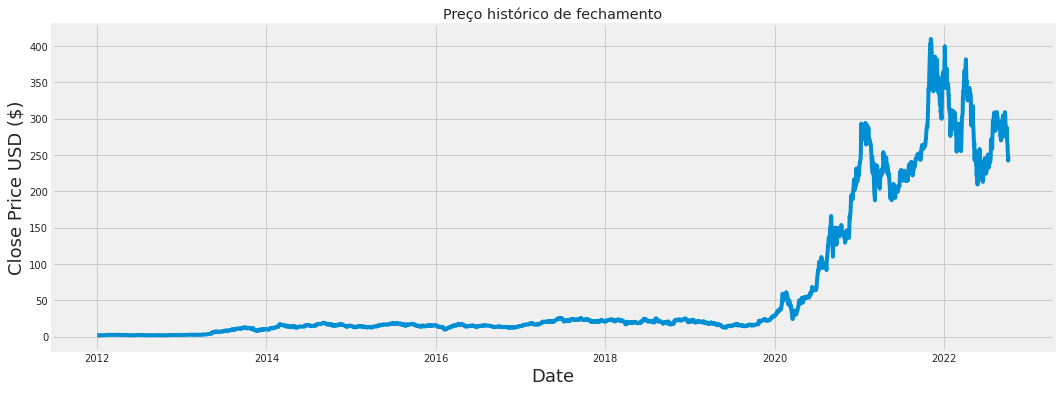

In [11]:
plt.figure(figsize = (16,6))
plt.title("Preço histórico de fechamento")
plt.plot(arquivo_df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.show()

In [12]:
# criando um dataframe apenas com dados de fechamento
dados = arquivo_df.filter(["Close"])

# Convertendo para um array numpy
dataset = dados.values

# obtendo o número de linhas de treinamento do modelo
dados_treino = int(np.ceil( len(dataset) * .95 ))

dados_treino

2572

In [13]:
# Dimensionando dados
from sklearn.preprocessing import MinMaxScaler

escalar = MinMaxScaler(feature_range = (0, 1))
escalar_dados = escalar.fit_transform(dataset)

escalar_dados

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.64568548],
       [0.58974236],
       [0.60352617]])

In [14]:
# Criando dataset de treino

treinamento_dados = escalar_dados[0 : int(dados_treino), :]

# Split dados entrada x_treino e y_treino do conjunto de dados
x_treino = []
y_treino = []

for i in range(60, len(treinamento_dados)):
    x_treino.append(treinamento_dados[i - 60 : i, 0])
    y_treino.append(treinamento_dados[i, 0])
    if i <= 61:
        print(x_treino)
        print(y_treino)
        print()
        
# Converter o x_treino e y_treino para um array numpy 
x_treino, y_treino = np.array(x_treino), np.array(y_treino)

# Reshape dos dados

x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1))

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [15]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [16]:
# Importando keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

2022-10-04 16:40:59.035404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 16:40:59.221965: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-04 16:40:59.804396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-04 16:40:59.804487: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [17]:
# Construindo modelo de Machine Learning
modelo = Sequential()
modelo.add(LSTM(128, return_sequences = True, input_shape = (x_treino.shape[1], 1)))
modelo.add(LSTM(64, return_sequences = False))
modelo.add(Dense(25))
modelo.add(Dense(1))

2022-10-04 16:41:00.522963: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-04 16:41:00.523003: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Aragorn): /proc/driver/nvidia/version does not exist
2022-10-04 16:41:00.523921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# Compilando modelo
modelo.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Treinando modelo
modelo.fit(x_treino, y_treino, batch_size = 1, epochs = 1)

2512/2512 [==============================] - 53s 20ms/step - loss: 0.0018


In [19]:
# Criando e testando
teste_dados = escalar_dados[dados_treino - 60: , :]


In [20]:
# Criando set de dados para X_Teste e Y_teste
x_teste = []
y_teste = dataset[dados_treino:,:]

for i in range(60, len(teste_dados)):
    x_teste.append(teste_dados[i - 60: i, 0])
    
# Converter dados para array numpy
x_teste = np.array(x_teste)

# Reshape dos dados
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1 ))

In [21]:
# valores previsto
predicoes = modelo.predict(x_teste)
predicoes = escalar.inverse_transform(predicoes)

# erro quadrático médio (RMSE)
rmse = np.sqrt(np.mean(((predicoes - y_teste) ** 2)))
rmse

5/5 [==============================] - 1s 30ms/step


27.772897401949

/tmp/ipykernel_5887/2799567403.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['Predictions'] = predicoes


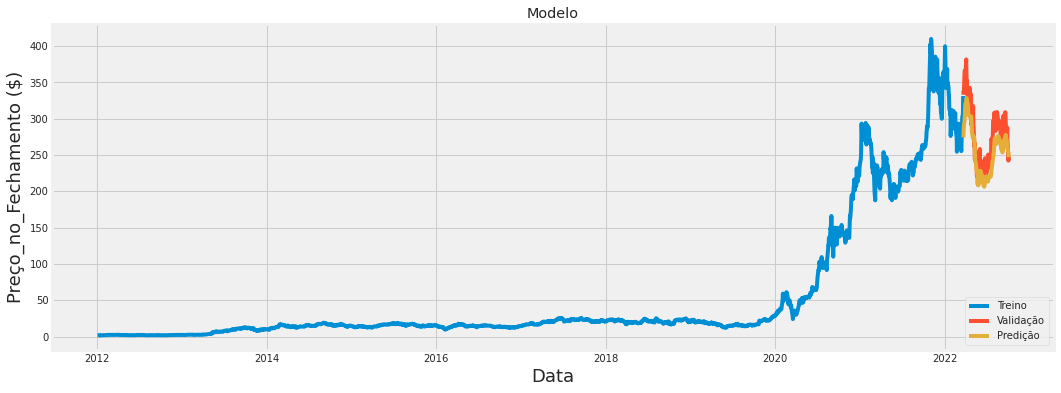

In [22]:
# plotando os dados

treino = dados[:dados_treino]
validacao = dados[dados_treino:]
validacao['Predictions'] = predicoes

# visualização dos dados
plt.figure(figsize = (16, 6))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preço_no_Fechamento ($)', fontsize = 18)
plt.plot(treino['Close'])
plt.plot(validacao[['Close', 'Predictions']])
plt.legend(['Treino', 'Validação', 'Predição'], loc = 'lower right')
plt.show()

In [23]:
validacao

,Close,Predictions
Date,,
2022-03-23,333.036682,274.362427
2022-03-24,337.973328,283.425262
2022-03-25,336.880005,291.258362
2022-03-28,363.946655,296.805450
2022-03-29,366.523346,304.803070
...,...,...
2022-09-28,287.809998,261.094421
2022-09-29,268.209991,260.367523
2022-09-30,265.250000,257.521423
